# Import Libaries

In [44]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

# Loading Dataset

In [60]:
df=pd.read_csv("cancer patient data sets.csv")

# Data Understanding

In [46]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [47]:
df.shape

(1000, 26)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## Descriptive Analysis

In [49]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# Data Preprocessing

In [50]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [61]:
df1 = df.copy()

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [11]:
categorical_columns = ['Level']

# Apply label encoding to each categorical column

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
# Removing irrelevant features
df=df.drop(['Patient Id'],axis=1)

# Exploratory Data Analysis

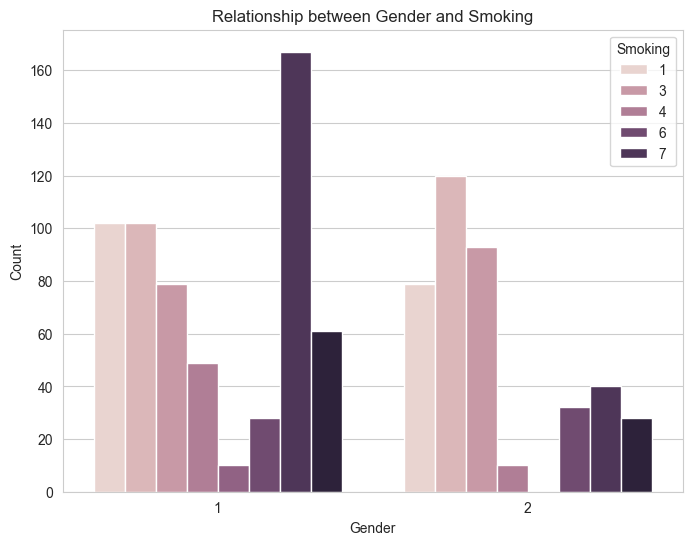

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Smoking')
plt.title('Relationship between Gender and Smoking')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

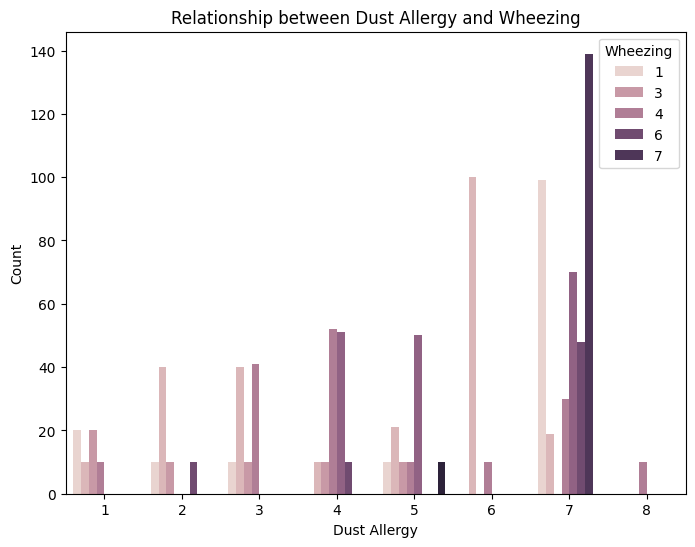

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dust Allergy', hue='Wheezing')
plt.title('Relationship between Dust Allergy and Wheezing')
plt.xlabel('Dust Allergy')
plt.ylabel('Count')
plt.show()


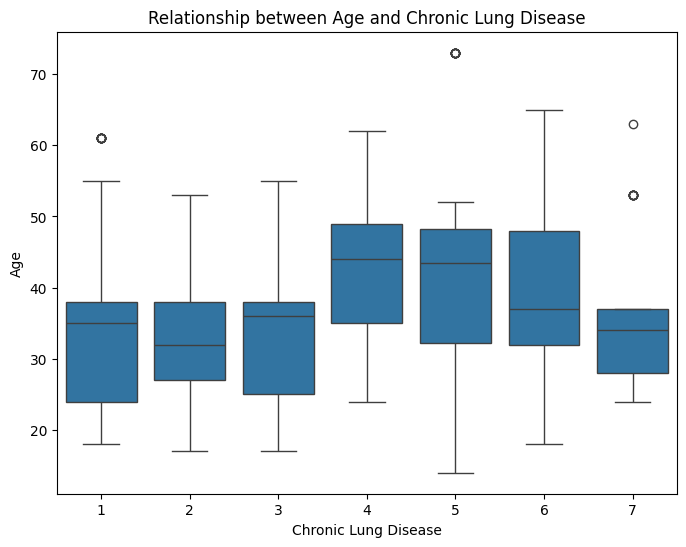

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='chronic Lung Disease', y='Age')
plt.title('Relationship between Age and Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Age')
plt.show()

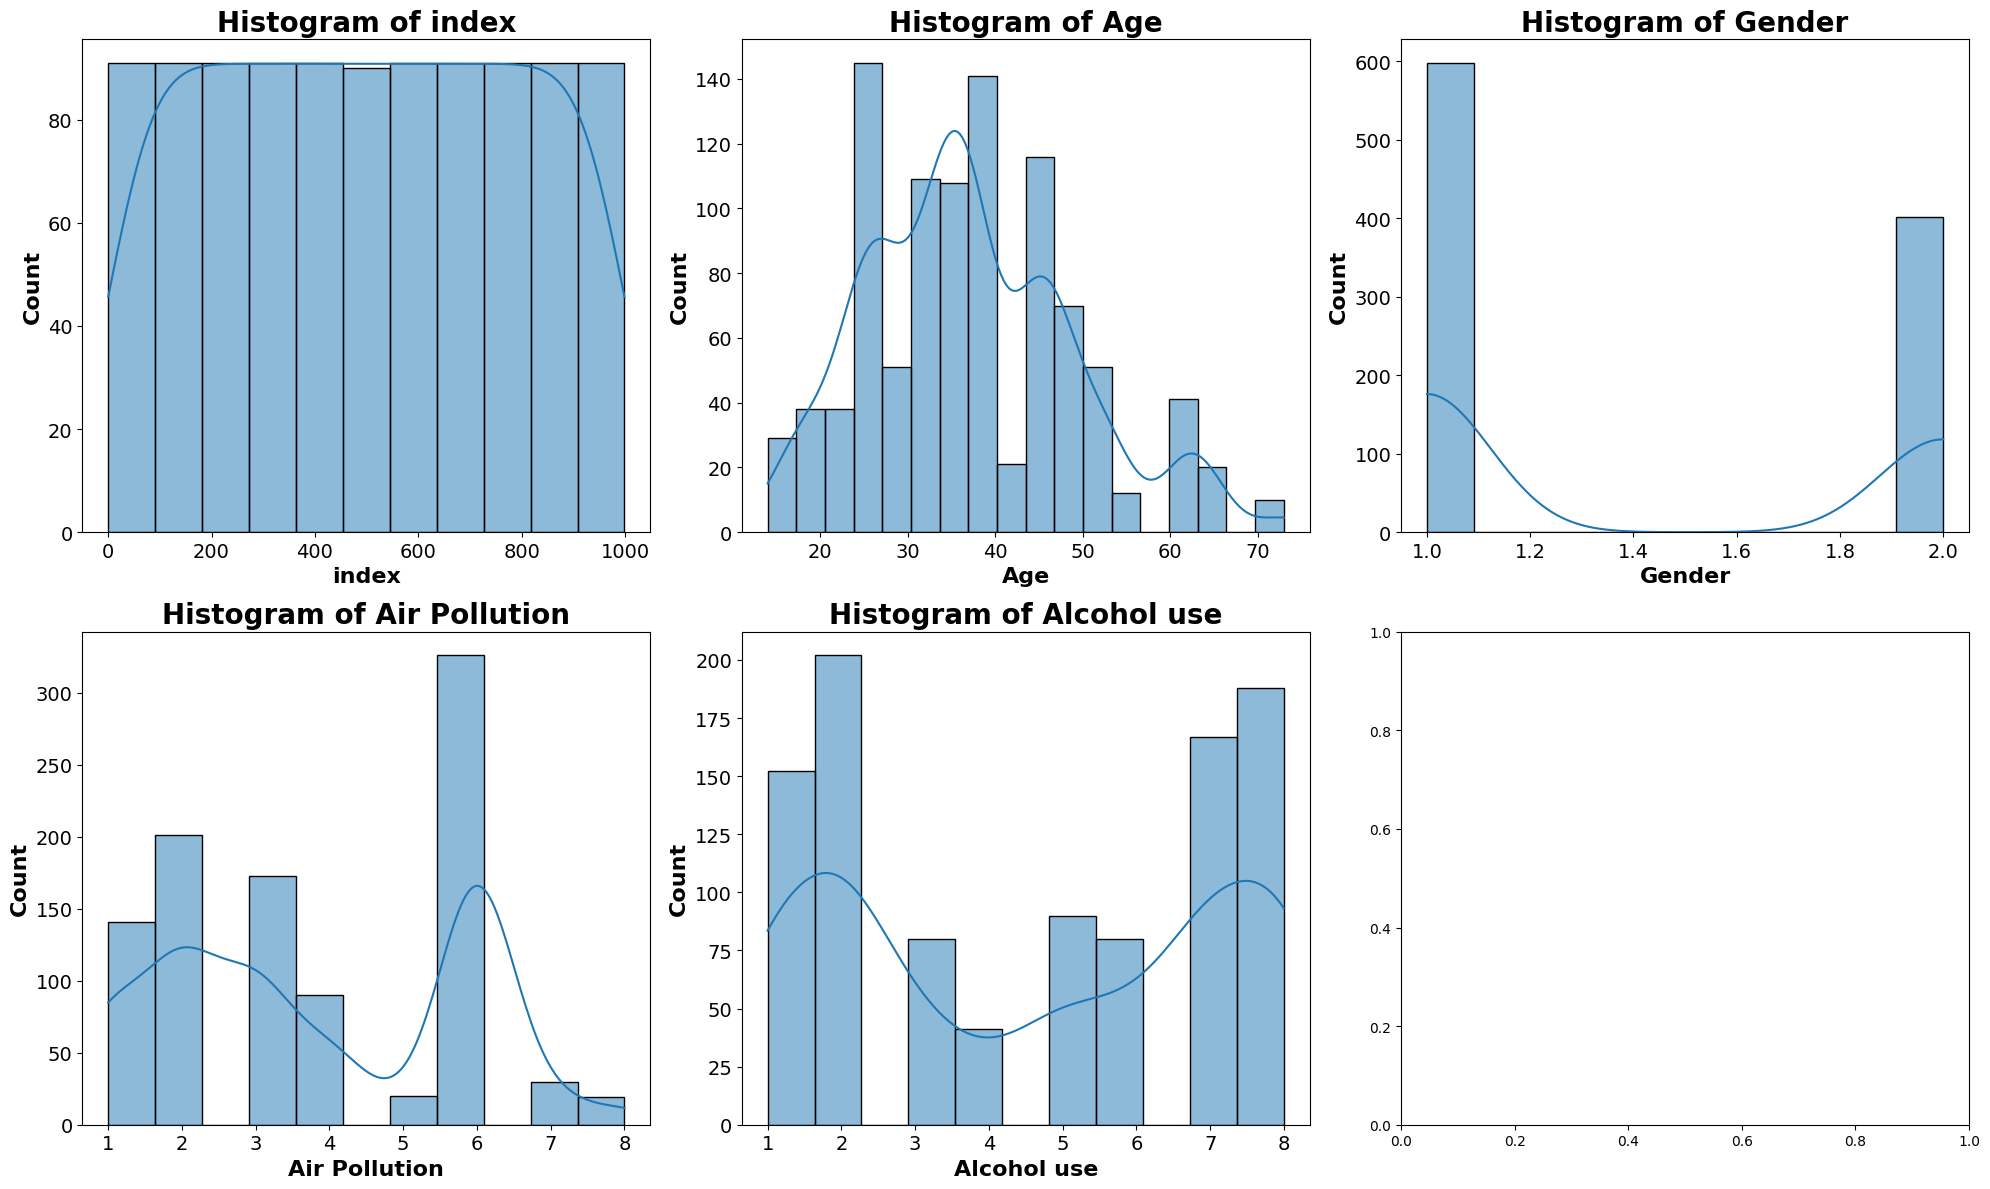

In [16]:
def plot_top5_histograms(data):
    """
    Plot histograms of the top 5 features in the DataFrame.

    Parameters:
    - data (DataFrame): Input DataFrame containing features.
    """
    # Select the top 5 features based on their numerical values
    top5_features = data.select_dtypes(include=['int64', 'float64']).columns[:5]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    
    # Plot histograms for each feature
    for i, feature in enumerate(top5_features):
        row = i // 3
        col = i % 3
        sns.histplot(data=data, x=feature, ax=axes[row, col], kde=True)
        axes[row, col].set_title(f'Histogram of {feature}', fontsize=20, fontweight='bold')
        axes[row, col].set_xlabel(feature, fontsize=16, fontweight='bold')
        axes[row, col].set_ylabel('Count', fontsize=16, fontweight='bold')
        axes[row, col].tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_top5_histograms(df)

**Correlation Heatmap**

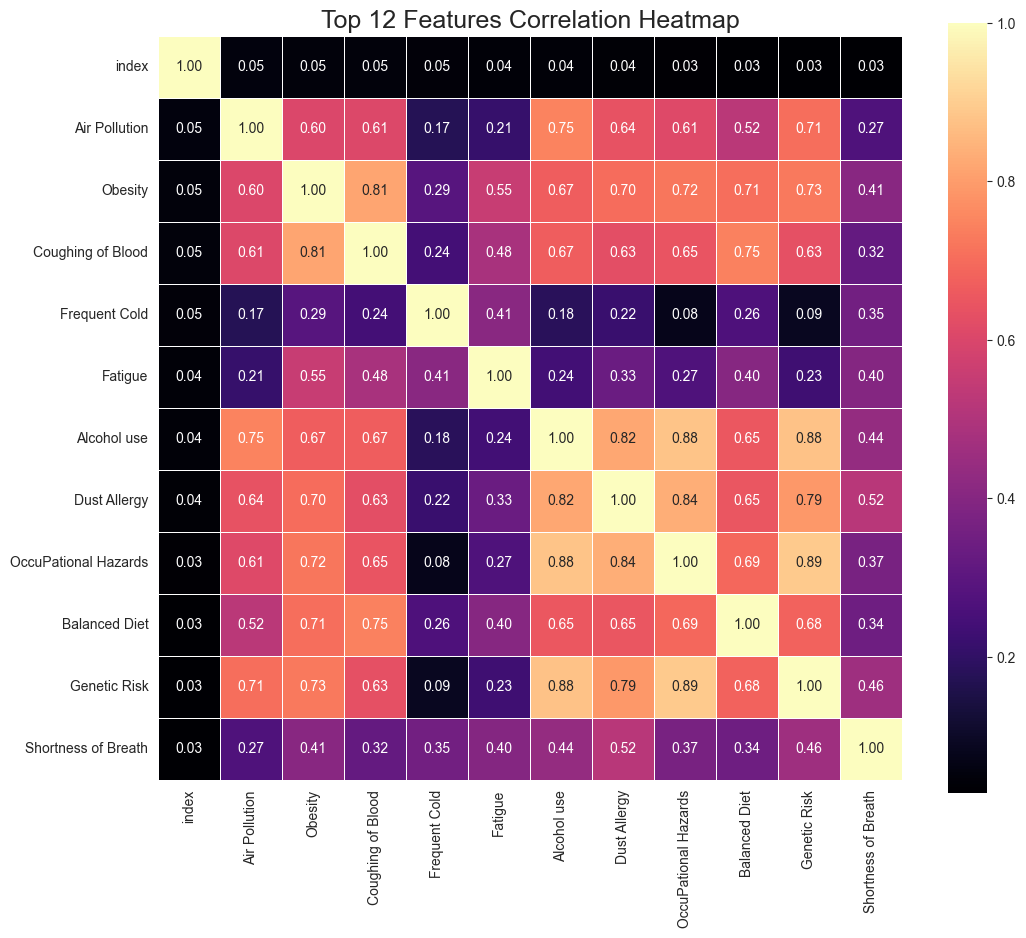

In [19]:
plt.figure(figsize=(12, 10))

# Selecting top 12 features for correlation heatmap
top_features = df.corr().nlargest(12, 'index')['index'].index
correlation_matrix = df[top_features].corr()

# Set background style
sns.set_style("whitegrid")

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5, square=True)

# Set title
plt.title("Top 12 Features Correlation Heatmap", fontsize=18)

# Display the plot
plt.show()

In [62]:
df1.set_index('index', inplace=True)

In [63]:
df1.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [64]:
mapping = {'Low':1,'Medium':2,'High':3}

In [65]:
df1['Level'] = df1['Level'].apply(lambda x:  mapping[x])

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
df1.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3


In [69]:
df1.drop(columns=['Patient Id'], inplace=True)

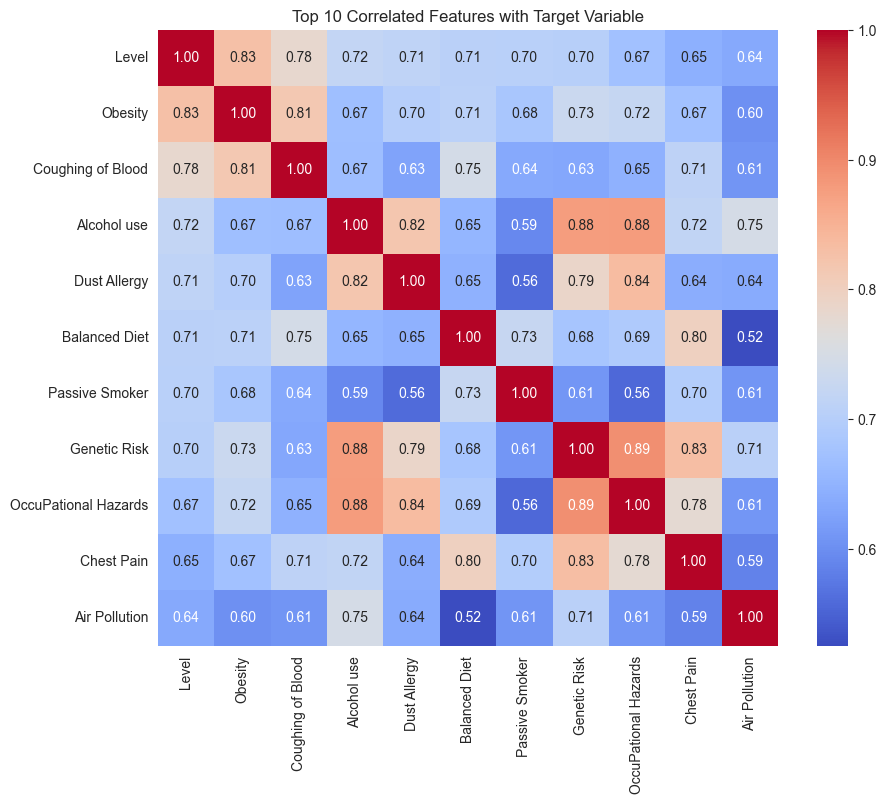

In [70]:
# Step 1: Calculate Correlation Coefficients
correlation_matrix = df1.corr()

# Step 2: Select Top Correlated Features with Target Variable
target_corr = correlation_matrix['Level'].drop('Level')  # Drop target_variable itself
top_correlated_features = target_corr.abs().nlargest(10).index  # Get top 12 features by absolute correlation

# Filter DataFrame to include only top correlated features + target variable
top_features_df = df1[['Level'] + list(top_correlated_features)]

# Step 3: Plot Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Correlated Features with Target Variable')
plt.show()

In [47]:
from tabulate import tabulate

def calculate_statistical_moments(df, top_n=15):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.
    - top_n (int): Number of top features to consider.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    # Select top n features based on some criteria like variance
    top_features = df.var().nlargest(top_n).index
    
    # Calculate moments only for top features
    moments = {
        'Mean': df[top_features].mean(),
        'Median': df[top_features].median(),
        'Standard Deviation': df[top_features].std(),
        'Skewness': df[top_features].skew(),
        'Kurtosis': df[top_features].kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(df, top_n=15):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.
    - top_n (int): Number of top features to consider.
    """
    moments_df = calculate_statistical_moments(df, top_n=top_n)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

# Example usage:
display_statistical_moments(df, top_n=15)



Statistical Moments:

+--------------------------+--------+----------+----------------------+------------+------------+
|                          |  Mean  |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+==========================+========+==========+======================+============+============+
|          index           | 499.5  |  499.5   |       288.819        |     0      |    -1.2    |
+--------------------------+--------+----------+----------------------+------------+------------+
|           Age            | 37.174 |    36    |       12.0055        |  0.551096  | 0.0595402  |
+--------------------------+--------+----------+----------------------+------------+------------+
|       Alcohol use        | 4.563  |    5     |       2.62048        |  -0.01639  |  -1.59602  |
+--------------------------+--------+----------+----------------------+------------+------------+
|         Smoking          | 3.948  |    3     |        2.4959        |  0.381312  |  -1.45115 

# Data Splitting

In [34]:
# Split the data into features and target

X=df.drop(['Level'],axis=1)
y=df['Level']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evalution

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
def train_and_predict(X_train, y_train, X_test, y_test):
    # Initialize the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, y_pred


In [45]:
# Example usage:
accuracy, y_pred = train_and_predict(X_train, y_train, X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


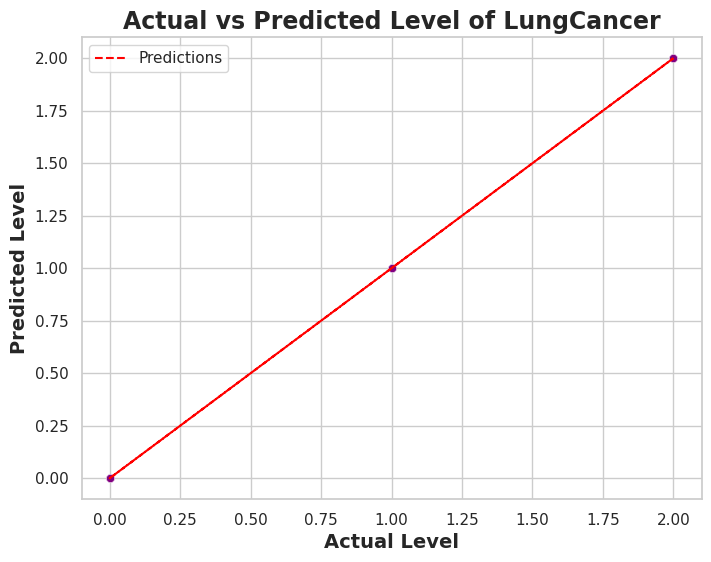

In [59]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Level of LungCancer', fontsize=17, fontweight='bold')
plt.xlabel('Actual Level', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Level', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

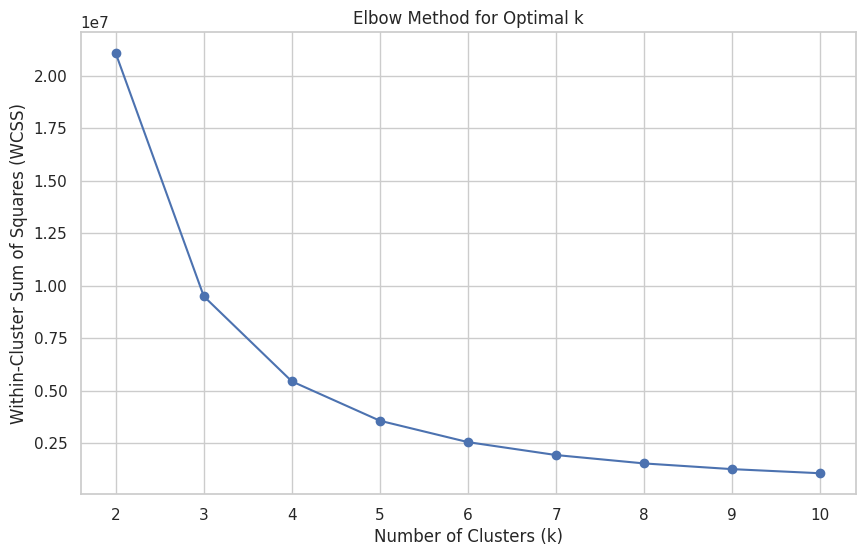

In [55]:
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

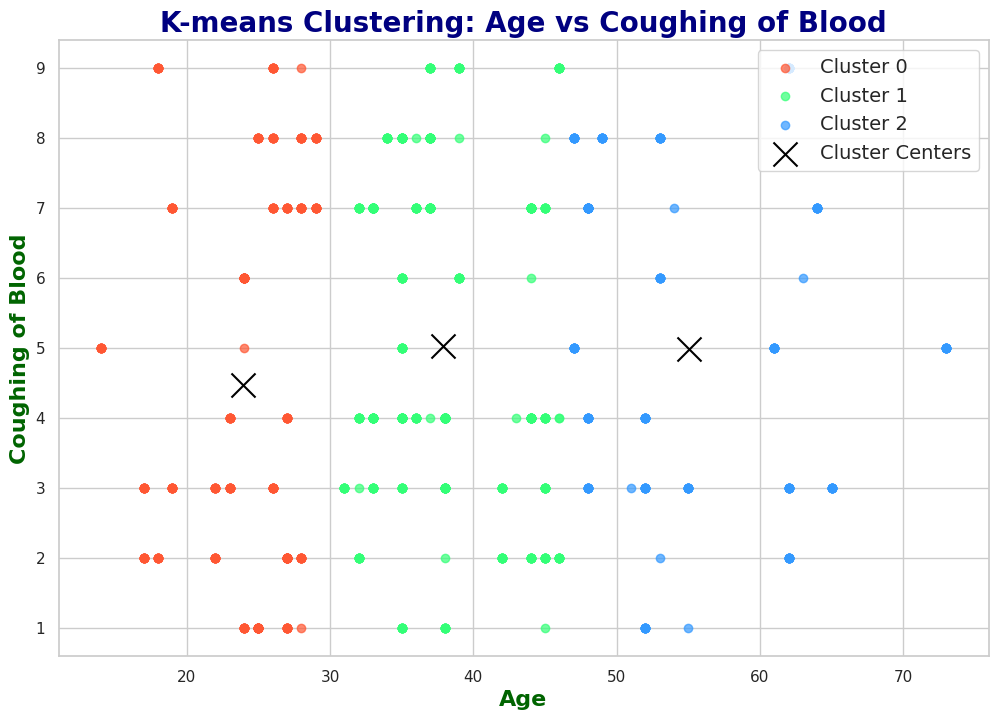

In [57]:
def plot_clusters(df):
    """
    Perform K-means clustering on the top 2 features and plot the clusters.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.
    """
    # Choose the top 2 features for clustering
    features = ['Age', 'Coughing of Blood']
    
    # Perform K-means clustering
    km = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
    df['cluster'] = km.fit_predict(df[features])  # Fit K-means and assign cluster labels

    # Set custom colors for clusters
    colors = ['#FF5733', '#33FF77', '#3399FF']  # You can choose your own colors here

    # Plot clusters with cluster centers
    plt.figure(figsize=(12, 8))

    # Plot each cluster using a different color
    for cluster_label, color in zip(sorted(df['cluster'].unique()), colors):
        cluster_data = df[df['cluster'] == cluster_label]
        plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster_label}', alpha=0.7, color=color)

    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')

    # Set plot title and labels
    plt.title(f'K-means Clustering: {features[0]} vs {features[1]}', fontsize=20, fontweight='bold', color='navy')
    plt.xlabel(features[0], fontsize=16, fontweight='bold', color='darkgreen')
    plt.ylabel(features[1], fontsize=16, fontweight='bold', color='darkgreen')

    # Add legend
    plt.legend(fontsize=14)
    plt.grid(True)

    plt.show()

# Example usage:
plot_clusters(df)